In [1]:
from cyclum import models

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle as pkl

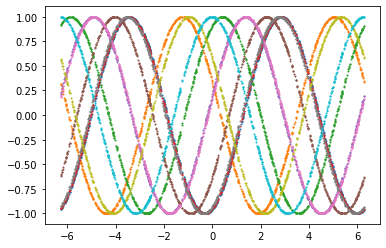

In [4]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.1, [1, 500])
gene01_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 800])

gene1_time = np.random.normal(0, 0.1, [1, 500])
gene1_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

for i in range(10):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [5]:
gene = gene0

In [6]:
model = models.AutoEncoder(input_width=gene.shape[1], 
                           encoder_depth=2, 
                           encoder_width=50, 
                           n_circular_unit=1,
                           n_logistic_unit=0, 
                           n_linear_bypass=0,
                           dropout_rate=0.1,
                           nonlinear_reg=1e-4)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


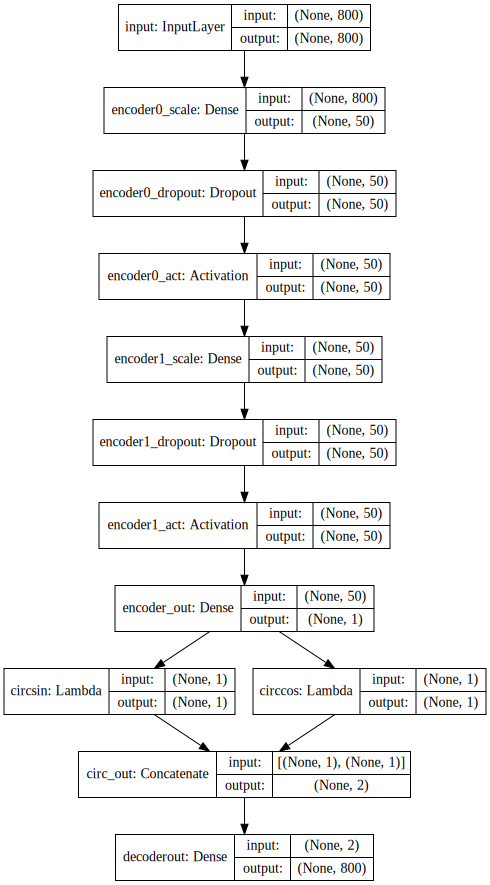

In [7]:
model.show_structure()

In [8]:
model.train(gene, epochs=1000, verbose=100, rate=1e-4)



epoch: 100/1000, loss:  0.2977, total train time:  6.29s
epoch: 200/1000, loss:  0.1385, total train time:  12.29s
epoch: 300/1000, loss:  0.0507, total train time:  18.29s
epoch: 400/1000, loss:  0.0394, total train time:  24.34s
epoch: 500/1000, loss:  0.0354, total train time:  30.39s
epoch: 600/1000, loss:  0.0329, total train time:  36.43s
epoch: 700/1000, loss:  0.0328, total train time:  42.44s
epoch: 800/1000, loss:  0.0310, total train time:  48.42s
epoch: 900/1000, loss:  0.0312, total train time:  54.42s
epoch: 1000/1000, loss:  0.0279, total train time:  60.42s


In [9]:
pseudotime = model.predict_pseudotime(gene)

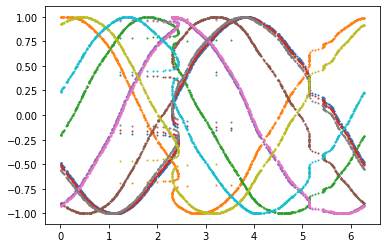

In [10]:
for i in range(10):
    plt.scatter(x=pseudotime[0] % (2 * np.pi), y=gene0[:, i], s=1)

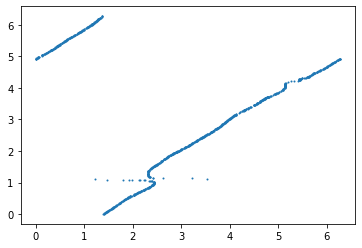

In [11]:
plt.scatter(pseudotime[0] % (2 * np.pi), cell_time % (2 * np.pi), s = 1)




